<a href="https://colab.research.google.com/github/Chubek/chubek/blob/master/v0_0_3b_detect_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install --upgrade git+https://github.com/chubek/intresignia.git

  Cloning https://github.com/chubek/intresignia.git to /tmp/pip-req-build-cukd80hx
  Running command git clone -q https://github.com/chubek/intresignia.git /tmp/pip-req-build-cukd80hx
  Created wheel for intresignia: filename=intresignia-0.0.3b0-py3-none-any.whl size=1114726 sha256=25a2c55b18b4312a16da637e61219acc44ddd06dab5a047f469973e45b053508
  Stored in directory: /tmp/pip-ephem-wheel-cache-y13bafdm/wheels/27/d2/ca/538c6e4e757e41931088c9268999a6c53f0fd0ef5711ead589
Successfully built intresignia


In [2]:
!gdown https://drive.google.com/uc?id=1ALSer8yQhpgMOGU2qd9z43KfFNSua7tA

# in case of premission error try multiple times

Downloading...
From: https://drive.google.com/uc?id=1ALSer8yQhpgMOGU2qd9z43KfFNSua7tA
To: /content/Large Project-20220503T074927Z-001.zip
100% 147M/147M [00:00<00:00, 247MB/s]


In [3]:
!unzip /content/Large\ Project-20220503T074927Z-001.zip

Archive:  /content/Large Project-20220503T074927Z-001.zip
  inflating: Large Project/IMG_20220502_224050.jpg  
  inflating: Large Project/IMG_20220502_223447.jpg  
  inflating: Large Project/IMG_20220502_222428.jpg  
  inflating: Large Project/IMG_20220503_084827.jpg  
  inflating: Large Project/IMG_20220502_223404.jpg  
  inflating: Large Project/IMG_20220427_230213.jpg  
  inflating: Large Project/IMG_20220502_223410.jpg  
  inflating: Large Project/IMG_20220502_223427.jpg  
  inflating: Large Project/1651000906484.jpg  
  inflating: Large Project/IMG_20220502_223033.jpg  
  inflating: Large Project/1651000906495.jpg  
  inflating: Large Project/IMG_20220502_225128.jpg  
  inflating: Large Project/IMG_20220502_222416.jpg  
  inflating: Large Project/IMG_20220429_150235.jpg  
  inflating: Large Project/IMG_20220502_223112.jpg  
  inflating: Large Project/1651000906499.jpg  
  inflating: Large Project/1651000906467.jpg  
  inflating: Large Project/1651000906491.jpg  
  inflating: Large

In [1]:
from intresignia import Settings, intresignia_detect
from google.colab.patches import cv2_imshow

Loaded 41 images to be used for matching


Pyring down the image as pyrd=True...
Isolating the color red based on your settings...
Found 1 circles...
Operating on circle 1/1...
Got a max score of 82.0 which belongs to No Parking...
Shape detected, adding to list...
DoClassify enabled, marking classification...
Done! Returning the output image, scores, sign coordinates and isolated color.
[{'bike_no_access.png': 21.0,
  'bike_no_access_old.png': 37.0,
  'give_way.png': 48.0,
  'no_access_axel_load_4_8.png': 43.0,
  'no_access_bicycles.png': 23.0,
  'no_access_bicycles_old.png': 30.0,
  'no_access_bus.png': 49.5,
  'no_access_bus_haulers.png': 43.0,
  'no_access_cars_bikes.png': 40.0,
  'no_access_cars_bikes_old.png': 37.0,
  'no_access_haulers.png': 38.0,
  'no_access_haulers_old.png': 35.0,
  'no_access_hazardous.png': 25.0,
  'no_access_millue_zone.png': 43.0,
  'no_access_mopeds.png': 19.0,
  'no_access_mopeds_bicycles.png': 28.0,
  'no_access_mopeds_bicycles_old.png': 40.5,
  'no_access_mopeds_old.png': 35.0,
  'no_access_mo

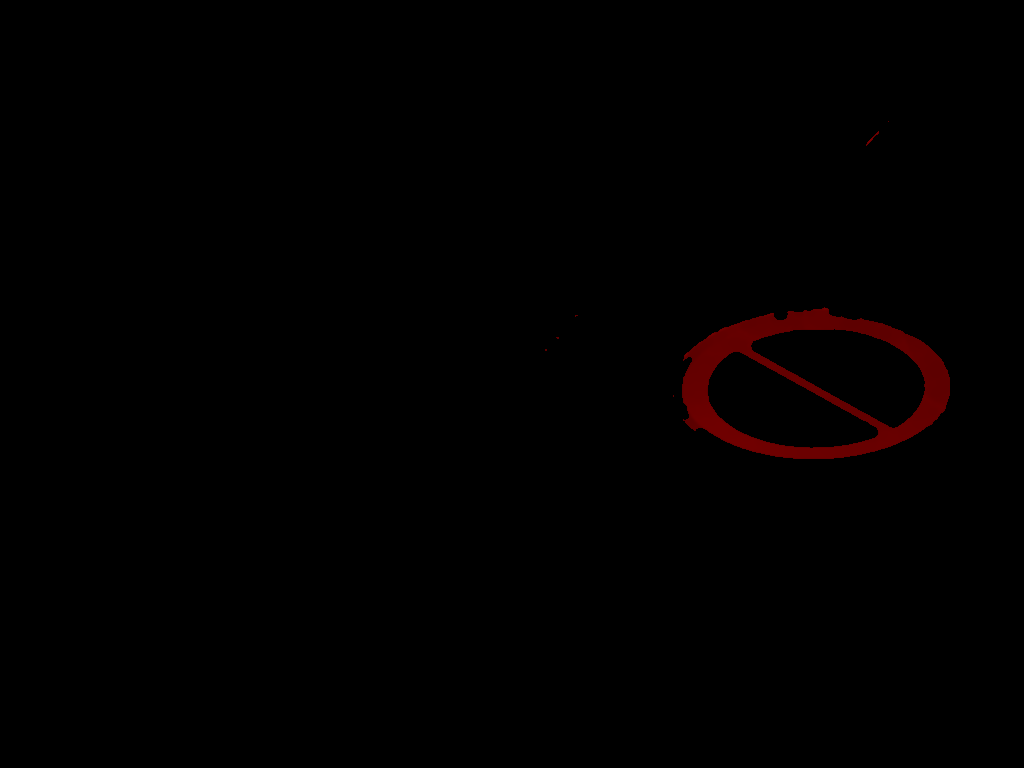

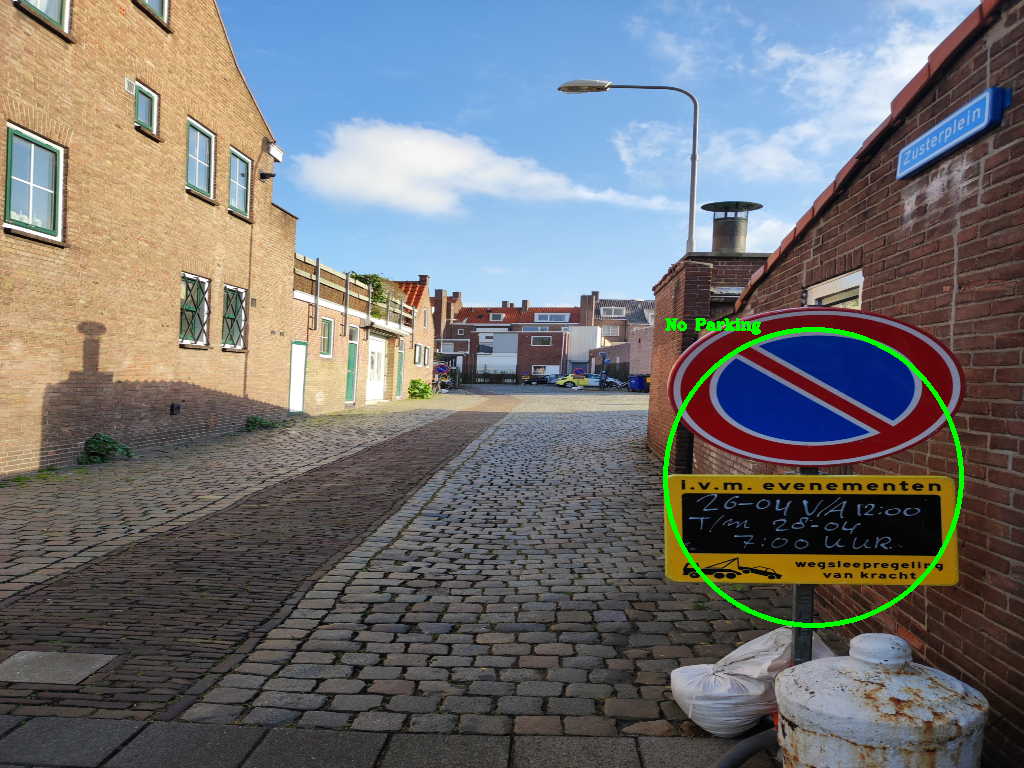

In [2]:
import cv2
from pprint import pprint

st = Settings(
    color_low= ((120, 50, 50), (130, 255, 255)), #lower color to filter in HSV max = (180, 255, 255)
    color_high = ((150, 60, 50), (180, 255, 255)), #higher color to filter in HSV max = (180, 255, 255)
    red_thresh = 90,                              #red threshold to weed out after filtering in RGB (max 255)
    dp = 2.8,                                      #inverse ratio of the accumulator resolution to the image resolution:
    min_dist_circle = 400,                        #minimum distance of circles from one another
    min_radius = 2,                                #minimum radius to filter
    max_radius = 150,                             #maximum radius to filter
    param_1 = 400,                              #canny param  for circle detection
    param_2 = 120,                              #accumulator threshold for circle detection
    do_op = False,                              #brighten image upon color detection, also adjust contrast, automatically, useful for night photos
    do_op_hsv = True,                           #normalize the HSV image used to create masks for color detection. Also add to hue (parameter below)
    add_hue = 18,                                #in case do_op_hsv is true
    do_op_circle = True,                        #do operations such as normalize and morphology and blur when detecting circles
    do_classify= True,                          #whether to mark the image with class
    classifier = "ORB",                          #classifier to use, choose between SSIM and ORB (the latter is better)
    thresh_temp = 50,                         #threshold score (max 1.0 for SSID and unbound for ORB --- hamming distance) for SSIM and ORB score. SSIM score makes sure the signs are what they are. But it's not precise in WHICH they are.

)

#detected image with marks, ssim and orb scores, coordinates for signs and isolated color image
det, ssim_scores, coords, color_isolated = intresignia_detect("/content/Large Project/1651000906476.jpg", st)

pprint(ssim_scores)
pprint(coords)

cv2_imshow(color_isolated)
cv2_imshow(det)